In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv("expanded_green_supplier_selection.csv")
data_array = df.drop(columns=["Supplier"]).to_numpy()
weights_green = np.array([0.10, 0.10, 0.07, 0.06, 0.03, 0.05, 0.10, 0.07, 0.06, 0.04, 0.05, 0.05, 0.07, 0.06, 0.04, 0.02, 0.03])



In [159]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data using MinMaxScaler
def normalize_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

In [160]:
def weighed_data(weight, data):
    weighed_normal = weights_green * data
    return weighed_normal


In [161]:
def ideals(weighted_normal, benefits):
    positive_ideal = np.max(weighted_normal, axis=0)
    negative_ideal = np.min(weighted_normal, axis=0)
    for i, benefit in enumerate(benefits):
        if not benefit:
            positive_ideal[i], negative_ideal[i] = negative_ideal[i], positive_ideal[i]
    return positive_ideal, negative_ideal


In [162]:
def distance(weighted_data, ideal):
    return np.sqrt(((weighted_data - ideal) ** 2).sum(axis=1))

In [163]:

def relative_closeness(positive_dist, negative_dist):
    return negative_dist / (negative_dist + positive_dist)


In [164]:

def topsis(data, weights, benefit_criteria):
    norm_data = normalize_data(data)
    weighted_norm = weighed_data(weights, norm_data)
    
    positive_ideal, negative_ideal = ideals(weighted_norm, benefit_criteria)
    
    distances_to_positive = distance(weighted_norm, positive_ideal)
    distances_to_negative = distance(weighted_norm, negative_ideal)
    
    closeness_scores = relative_closeness(distances_to_positive, distances_to_negative)
    

    rankings = np.argsort(closeness_scores)[::-1]  # Sort in descending order
    
    return closeness_scores, rankings, positive_ideal, negative_ideal, weighted_norm, distances_to_positive, distances_to_negative


In [165]:

# Define benefit criteria
benefit_criteria = [False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True]

# Run TOPSIS
closeness_scores, rankings, positive_ideal, negative_ideal, weighted_norm, distances_to_positive, distances_to_negative= topsis(data_array, weights_green, benefit_criteria)

# Print results
print("Closeness Scores:", closeness_scores)
print("Rankings (from best to worst):", rankings + 1)

Closeness Scores: [0.63292151 0.54437435 0.41547418 0.39054305 0.58208915 0.6426559
 0.56579528 0.42319073 0.42369767 0.6071939  0.49684492 0.68970705
 0.38132218 0.52270476 0.44334759 0.64807351 0.55962997 0.48972181
 0.53549904 0.52117718 0.62171491 0.48612416 0.55691943 0.43390996
 0.49692385 0.38720817 0.38317122 0.56752244 0.54259013 0.44329477
 0.42069327 0.45308513 0.39829176 0.50069854 0.53989055 0.43536207
 0.54433039 0.46267706 0.5479959  0.51269826 0.44592694 0.44664677
 0.46432695 0.5323749  0.43082967 0.53434266 0.51646431 0.48372598
 0.48973811 0.39862647 0.58337786 0.50828446 0.42547315 0.43001755
 0.51205688 0.52059178 0.4291861  0.58653584 0.47532454 0.49395128]
Rankings (from best to worst): [12 16  6  1 21 10 58 51  5 28  7 17 23 39  2 37 29 35 19 46 44 14 20 56
 47 40 55 52 34 25 11 60 49 18 22 48 59 43 38 32 42 41 15 30 36 24 45 54
 57 53  9  8 31  3 50 33  4 26 27 13]


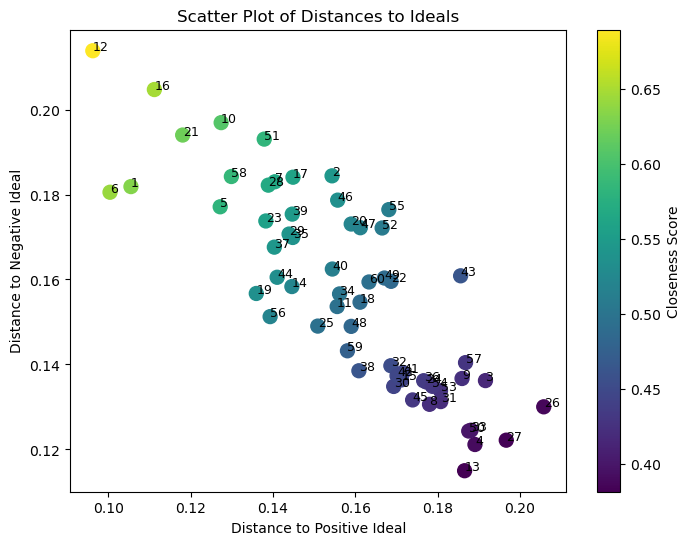

In [166]:
# Scatter plot of positive and negative distances
positive_distances = distance(weighted_norm, positive_ideal)
negative_distances = distance(weighted_norm, negative_ideal)

plt.figure(figsize=(8, 6))
plt.scatter(positive_distances, negative_distances, c=closeness_scores, cmap='viridis', s=100)
for i, txt in enumerate(range(1, len(closeness_scores) + 1)):
    plt.annotate(txt, (positive_distances[i], negative_distances[i]), fontsize=9)
plt.xlabel("Distance to Positive Ideal")
plt.ylabel("Distance to Negative Ideal")
plt.title("Scatter Plot of Distances to Ideals")
plt.colorbar(label="Closeness Score")
plt.show()



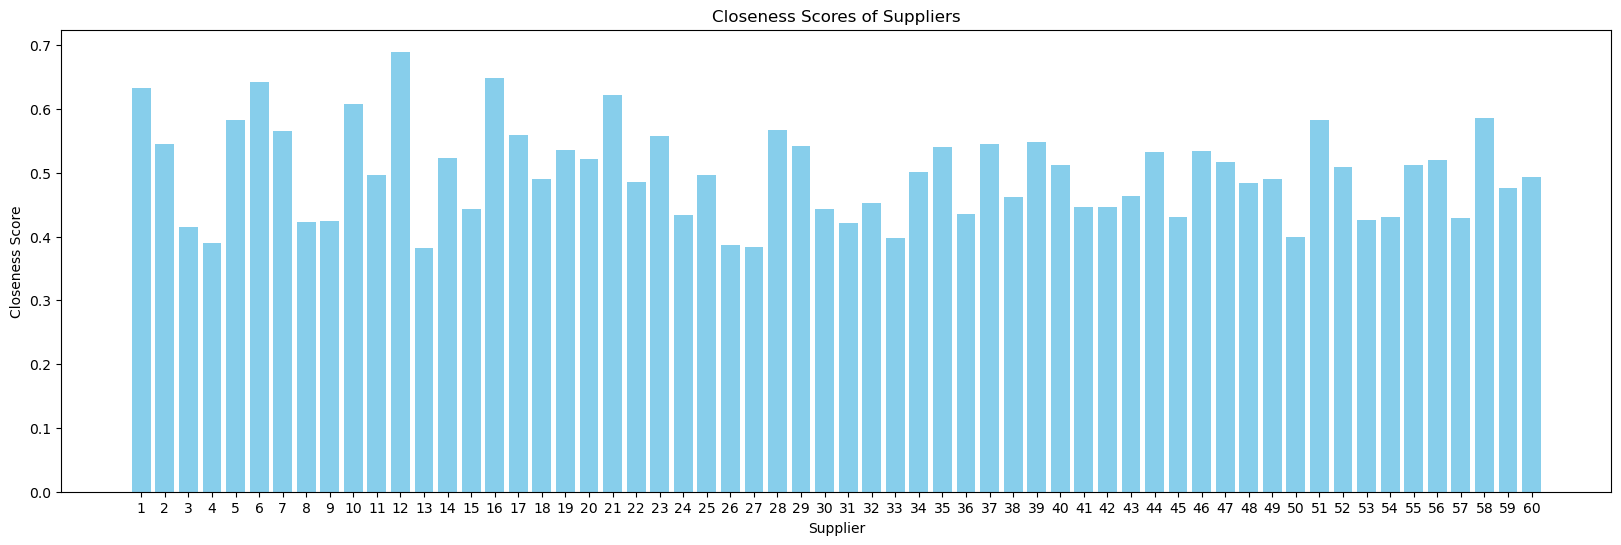

In [167]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Bar plot of closeness scores
plt.figure(figsize=(20, 6))
plt.bar(range(1, len(closeness_scores) + 1), closeness_scores, color='skyblue')
plt.xlabel("Supplier")
plt.ylabel("Closeness Score")
plt.title("Closeness Scores of Suppliers")
plt.xticks(range(1, len(closeness_scores) + 1))  # Label suppliers from 1 upwards
plt.show()



In [168]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Supplier', 'Green Image (1-10)'])
feature_names = x.columns
y = df['Green Image (1-10)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [169]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop(columns=['Supplier', 'Green Image (1-10)'])
y = df['Green Image (1-10)']

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Original dataset size:", df.shape)
print("Resampled dataset size:", X_resampled.shape)


Original dataset size: (60, 18)
Resampled dataset size: (76, 16)


In [170]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [171]:
classifier.predict([[70,8,7,9,5,200,9,7,8,9,7,8,120,9,8,6]])

c:\Users\bhavy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([8], dtype=int64)

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(x_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           6       0.40      0.40      0.40         5
           7       0.50      0.50      0.50         2
           8       0.62      0.71      0.67         7
           9       1.00      0.50      0.67         2

    accuracy                           0.56        16
   macro avg       0.63      0.53      0.56        16
weighted avg       0.59      0.56      0.56        16

[[2 1 2 0]
 [0 1 1 0]
 [2 0 5 0]
 [1 0 0 1]]


In [173]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
a = [[90,2,7,9,5,90,7,7,8,9,7,8,120,9,8,6]]

x_test_df = pd.DataFrame(a, columns=feature_names)
model.predict(x_test_df)



array([6], dtype=int64)